In [1]:
'''
params.py
'''
from . import params
from params import B, E, rhon, K, Omega0, Omegan0, beta, nug0, Omega, N


ModuleNotFoundError: No module named 'params'

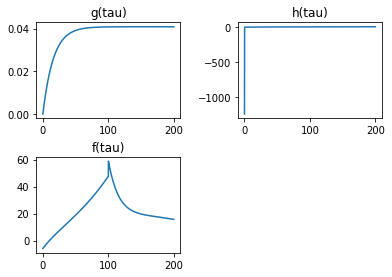

In [ ]:
'''
when calc. f, using the formula of only h(tau) as input
'''
import numpy as np
import matplotlib.pyplot as plt


def omega(r):
  b = beta + np.power(1 - np.power(r, 2.0), -3/4)
  c = beta * rhon * np.power(1 - np.power(r, 2.0), -3/4)
  omega_p = 0.5 * (-b + np.sqrt(np.power(b, 2.0) - 4 * c))
  omega_m = 0.5 * (-b - np.sqrt(np.power(b, 2.0) - 4 * c))
  return omega_p, omega_m


def g(tau):
  r = np.arange(0,1,1e-3)
  omega_p, omega_m = omega(r)
  y = r*3 * np.power(1 - np.power(r, 2.0), -1/4) * (np.exp(omega_p * tau) - np.exp(omega_m * tau))/(omega_p - omega_m)
  gtau = 7.5 * np.trapz(y, r)
  return gtau

def iconv(signal, kernel):
  signal_fft = np.fft.fft(signal)
  kernel_fft = np.fft.fft(kernel)

  result_fft = np.divide(1.0, kernel_fft, out=np.zeros_like(kernel_fft), where=kernel_fft!=0)

  result_fft = result_fft * signal_fft

  result = np.fft.ifft(result_fft).real
  return result


t = np.arange(0, N, 1e-1)
tau = np.sqrt(E) * Omega * t

y = []
# yprime = 20/7 * tau
for _ in tau:
  gtau = g(_)
  y.append(gtau)

exptau = np.exp(-beta * tau)
yp = np.array(y + 1./(rhon * K) * exptau )
h = iconv(exptau, yp)
I = np.ones(len(tau))


f = Omega0
f = f + (Omegan0 - Omega0) * np.exp(-beta * tau)

f = f + (1 - Omega0) /(rhon * K) * np.convolve(I, h, mode='same')
f = f - (Omegan0 - Omega0) / (rhon * K) * np.convolve(np.exp(-beta * tau), h, mode='same')

plt.subplot(2,2,1)
plt.plot(t,y)
plt.title('g(tau)')

plt.subplot(2,2,2)
plt.plot(t,h)
plt.title('h(tau)')

plt.subplot(2,2,3)
plt.plot(t, f)
plt.title('f(tau)')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

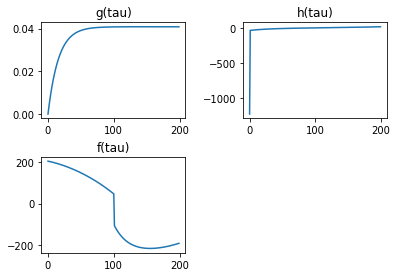

In [ ]:
'''
When calc. f, using the formula of g(tau), h(tau) as input
'''
import numpy as np
import matplotlib.pyplot as plt


def omega(r):
  b = beta + np.power(1 - np.power(r, 2.0), -3/4)
  c = beta * rhon * np.power(1 - np.power(r, 2.0), -3/4)
  omega_p = 0.5 * (-b + np.sqrt(np.power(b, 2.0) - 4 * c))
  omega_m = 0.5 * (-b - np.sqrt(np.power(b, 2.0) - 4 * c))
  return omega_p, omega_m


def g(tau):
  r = np.arange(0,1,1e-3)
  omega_p, omega_m = omega(r)
  y = r*3 * np.power(1 - np.power(r, 2.0), -1/4) * (np.exp(omega_p * tau) - np.exp(omega_m * tau))/(omega_p - omega_m)
  gtau = 7.5 * np.trapz(y, r)
  return gtau

def iconv(signal, kernel):
  signal_fft = np.fft.fft(signal)
  kernel_fft = np.fft.fft(kernel)

  result_fft = np.divide(1.0, kernel_fft, out=np.zeros_like(kernel_fft), where=kernel_fft!=0)

  result_fft = result_fft * signal_fft

  result = np.fft.ifft(result_fft).real
  return result


t = np.arange(0, N, 1e0)
tau = np.sqrt(E) * Omega * t

y = []
# yprime = 20/7 * tau
for _ in tau:
  gtau = g(_)
  y.append(gtau)

exptau = np.exp(-beta * tau)
yp = np.array(y + 1./(rhon * K) * exptau )
h = iconv(exptau, yp)
I = np.ones(len(tau))


f = Omega0
f = f + (1 - Omega0) /(rhon * K) * np.convolve(I, h, mode='same')
f = f + (Omegan0 - Omega0) * np.convolve(np.array(y), h, mode='same')

plt.subplot(2,2,1)
plt.plot(t,y)
plt.title('g(tau)')

plt.subplot(2,2,2)
plt.plot(t,h)
plt.title('h(tau)')

plt.subplot(2,2,3)
plt.plot(t, f)
plt.title('f(tau)')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

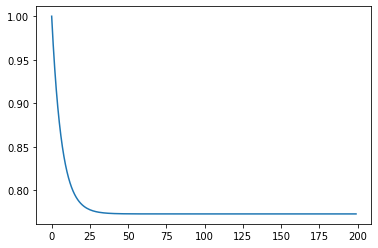

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

finf = (1. + K * Omega0) / (1 + K)
C = (Omegan0 - finf)

t = np.arange(0, N, 1)
tau = np.sqrt(E) * Omega * t

ftau = finf
ftau = ftau + C * np.exp(-beta*(1. + 1./K) * tau)
ftau = ftau + (1. - C - finf) * np.exp(-beta * tau)

plt.plot(t, ftau)

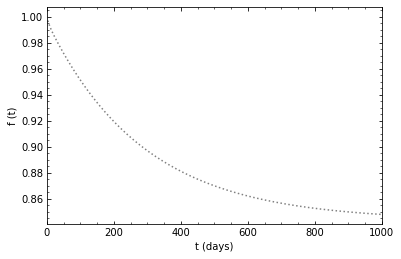

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


finf = (1. + K * Omega0) / (1 + K)
C = (Omega0 - Omegan0) / (beta/(20./7 * rhon * K) - 1.)

t = np.arange(0, N, 1) 
tau = np.sqrt(E) * Omega * t

ftau = finf
ftau += C * np.exp(- beta * tau)
ftau += (1. - C - finf) * np.exp(- 20. / 7 * rhon * (1 + K) * tau)

plt.plot(t, ftau, linestyle='dotted', color='grey')

#
plt.xlim(0,N)
# plt.ylim(0.842, 1.0)
plt.xlabel('t (days)')
plt.ylabel('f (t)')

# set the minor ticks
plt.minorticks_on()

# set tick params
plt.tick_params(axis="both", which="both", direction="in", 
                top=True, bottom=True, left=True, right=True)

# plt.savefig("vela_1985.pdf")
plt.show()